# Read in .mat file

In [27]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
filePath = '/Users/ivanaescobar/Dropbox/UT_CSEM_2016-202*/research/crios_research/ARL_nesba/YT_data_fig_Sharp_ssp/'
fileName = 'Sharp_xshelf_ctd59-69.mat'
file = filePath + fileName

In [3]:
mat = scipy.io.loadmat(file)
keys_to_remove = ("__header__", "__version__", "__globals__")
for k in keys_to_remove:
    mat.pop(k, None)

In [4]:
print(type(mat))
print(mat.keys())

<class 'dict'>
dict_keys(['ibdpth', 'idpth', 'ilat', 'ilon', 'isalt', 'isvcm', 'itemp', 'lat', 'lon', 'salt', 'sname', 'svcm', 'temp'])


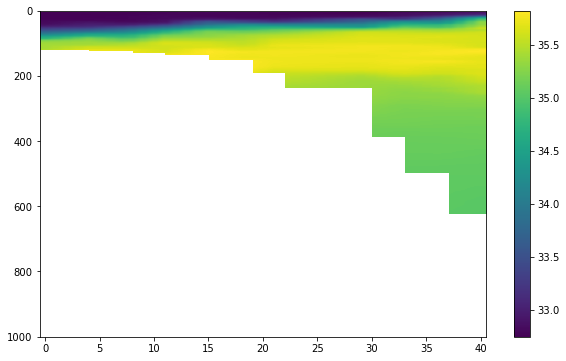

In [10]:
plt.figure(figsize=(10,6))
plt.imshow(mat["isalt"], aspect="auto")
plt.colorbar()

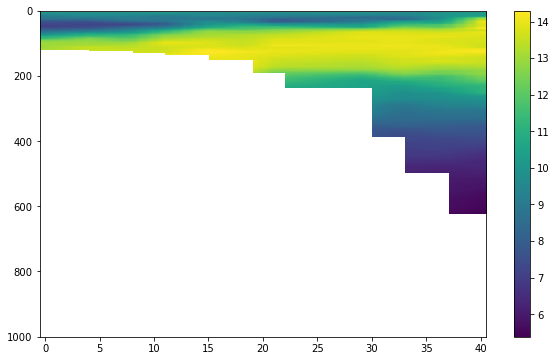

In [11]:
plt.figure(figsize=(10,6))
plt.imshow(mat["itemp"], aspect="auto")
plt.colorbar()

# Extra: save as an xarray compatible netcdf file

modify dictionary to use **from_dict** xarray method

only saving:
- *ibdpth*: Dimension of dataSet
- *idpth*: Dimension of dataSet
- *ilat*: unused latitutdes 
- *ilon*: unused longitutdes 
- *isalt*: Data variable salinity
- *isvcm*: Data variable sound speed
- *itemp*: Data variable temperature

In [12]:
import xarray as xr

In [39]:
d = {
    "depth": {"dims": ("depth"), "data":list(mat["ibdpth"].flat)},
    "range": {"dims": ("range"), "data":list(mat["idpth"].flat)},
    "lat":   {"dims": ("depth"), "data":list(mat["ilat"].flat)},
    "lon":   {"dims": ("depth"), "data":list(mat["ilon"].flat)},
    "salt":  {"dims": ("range","depth"), "data":mat["isalt"].tolist()},
    "temp":  {"dims": ("range","depth"), "data":mat["itemp"].tolist()},
    "ss":    {"dims": ("range","depth"), "data":mat["isvcm"].tolist()}
}

In [40]:
ds = xr.Dataset.from_dict(d)

In [41]:
ds

<xarray.Dataset>
Dimensions:  (depth: 41, range: 1001)
Coordinates:
  * depth    (depth) float64 125.7 127.1 128.5 130.1 ... 695.3 759.3 814.3 872.3
  * range    (range) int16 0 -1 -2 -3 -4 -5 ... -995 -996 -997 -998 -999 -1000
Data variables:
    lat      (depth) float64 40.22 40.21 40.2 40.19 ... 39.88 39.87 39.86 39.85
    lon      (depth) float64 -70.91 -70.91 -70.91 -70.9 ... -70.88 -70.88 -70.89
    salt     (range, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    temp     (range, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    ss       (range, depth) float64 nan nan nan nan nan ... nan nan nan nan nan

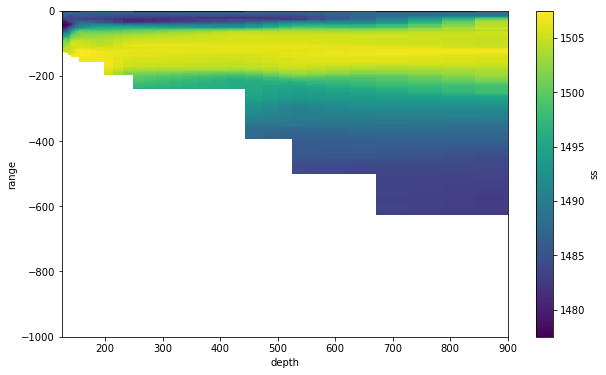

In [45]:
plt.figure(figsize=(10,6))
ds.ss.plot()